In [47]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_roc_curve
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
defaults = pd.read_csv("../../data/SVM_exercises/defaults.csv", sep = ";")

defaults.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,27999.00000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,...,27999.000000,27999.000000,27999.000000,27999.000000,2.799900e+04,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000
mean,14000.00000,167099.170685,1.604557,1.845780,1.556484,35.380264,-0.010572,-0.130112,-0.163292,-0.217472,...,43222.489696,40387.979856,38903.331155,5579.850923,5.847387e+03,5131.236580,4813.350048,4755.416801,5184.075574,0.221794
std,8082.75943,129742.554832,0.488954,0.785705,0.521295,9.276226,1.122965,1.194718,1.195233,1.163331,...,64235.169551,60759.487603,59435.211063,15162.343572,2.105127e+04,16606.364862,15307.325671,14887.656280,17602.985657,0.415460
min,1.00000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7000.50000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2378.000000,1799.500000,1268.000000,1000.000000,8.395000e+02,390.000000,295.000000,264.000000,109.000000,0.000000
50%,14000.00000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19129.000000,18239.000000,17212.000000,2100.000000,2.008000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,20999.50000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54391.000000,50150.500000,49165.500000,5005.000000,5.000000e+03,4500.000000,4010.000000,4026.500000,4000.000000,0.000000
max,27999.00000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.000000,528897.000000,417990.000000,528666.000000,1.000000


In [6]:
defaults.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [10]:
defaults["default payment next month"].value_counts() / len(defaults)

0    0.778206
1    0.221794
Name: default payment next month, dtype: float64

## Zbiór jest lekko niezbalansowany - 22% jedynek w klasie decyzyjnej (default payment next month)

In [13]:
defaults = defaults.sample(n = 2000)

### Czy do oceny jakości klasyfikacji modelu korzystniejsza jest w tym przypadku F miara czy “balanced accuracy”.

### F Score vs Balanced Accuracy - przez to, że korzystam z niezbalansowanych danych to do oceny jakości klasyfikacji modelu korzystniejsze jest balanced accuracy. Balanced Accuracy to średnia ze Specifity i Recall. Obydwie te metryki są niewrażliwe na niezbalansowanie zbioru uczącego.

In [15]:
y = defaults.pop("default payment next month")
X = defaults.copy()

In [40]:
model = SVC(gamma="scale")
cv_results = cross_validate(
    estimator=model,
    X=X,
    y=y,
    scoring=["roc_auc", "recall", "balanced_accuracy"],
    cv=5,
    return_train_score=True
)

In [41]:
cv_results = pd.DataFrame(cv_results)

In [42]:
cv_results

,fit_time,score_time,test_roc_auc,train_roc_auc,test_recall,train_recall,test_balanced_accuracy,train_balanced_accuracy
0,0.098770,0.064791,0.555451,0.725001,0.0,0.0,0.5,0.5
1,0.085784,0.059838,0.540606,0.709750,0.0,0.0,0.5,0.5
2,0.099737,0.067821,0.589556,0.716508,0.0,0.0,0.5,0.5
3,0.094024,0.066027,0.613510,0.709720,0.0,0.0,0.5,0.5
4,0.099767,0.063796,0.591469,0.721746,0.0,0.0,0.5,0.5


C:\Users\admin\anaconda3\envs\kaggle_korwin_ds_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


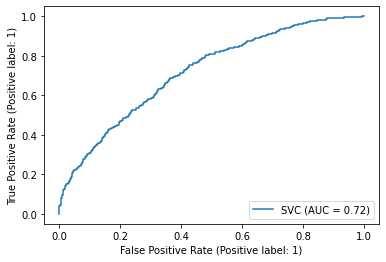

In [46]:
model.fit(X, y)
plot_roc_curve(model, X, y)

In [ ]:
result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

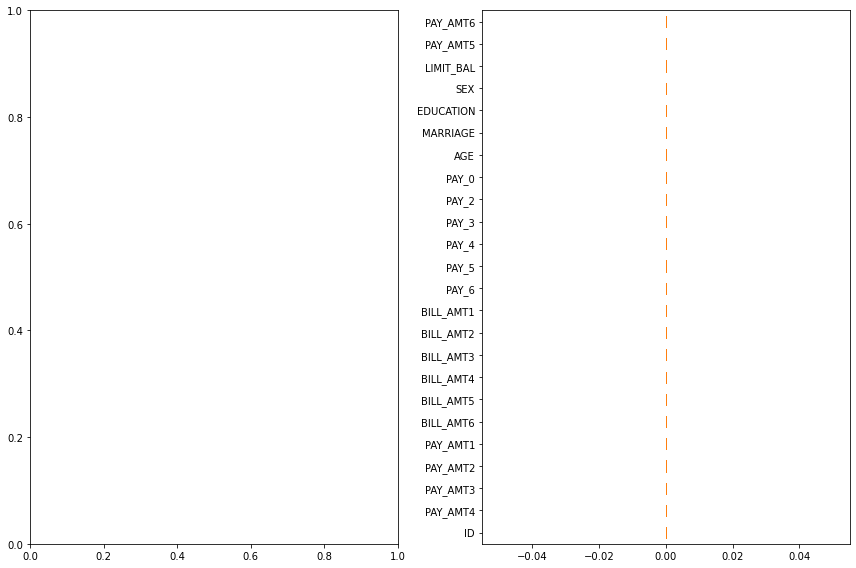

In [49]:
# tree_importance_sorted_idx = np.argsort(model.X.columns)
# tree_indices = np.arange(0, len(model.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
# ax1.barh(tree_indices, model.feature_importances_[tree_importance_sorted_idx], height=0.7)
# ax1.set_yticks(tree_indices)
# ax1.set_yticklabels(X.columns[tree_importance_sorted_idx])
# ax1.set_ylim((0, len(model.feature_importances_)))
ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=X.columns[perm_sorted_idx],
)
fig.tight_layout()
plt.show()